In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

2025-10-22 02:04:58.655452: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761098698.949006      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761098699.048680      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test_data = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y_train = train_data['label']
X = train_data.drop(labels='label',axis=1)
del train_data
X.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

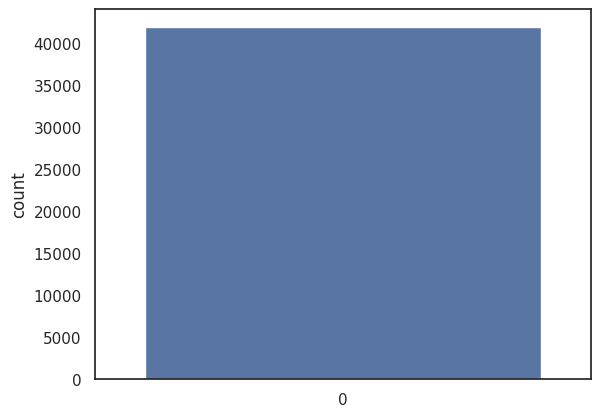

In [5]:
g = sns.countplot(y_train)
y_train.value_counts()

In [6]:
print(X.isnull().any().describe())
print(test_data.isnull().any().describe())

count       784
unique        1
top       False
freq        784
dtype: object
count       784
unique        1
top       False
freq        784
dtype: object


In [7]:
X = X/255.0
test_data = test_data/255.0


In [8]:
X = X.values.reshape(-1,28,28,1)
test_data = test_data.values.reshape(-1,28,28,1)


In [9]:
y_train = to_categorical(y_train,num_classes=10)
random_seed=3

In [10]:
X_train,X_val,y_train2,y_val = train_test_split(X,y_train,test_size=.1,random_state=random_seed)


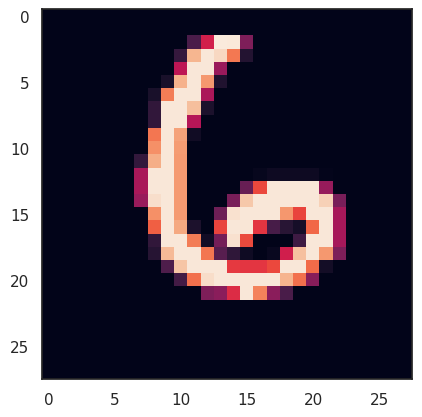

In [11]:
plt.imshow(X_train[0][:,:,0])

In [12]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(5,5),padding = 'Same',activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(filters=32,kernel_size=(5,5),padding = 'Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding = 'Same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(256, activation ="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation ="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-22 02:05:23.526538: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [13]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
LR_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 10
batch_size = 80

In [15]:
model.fit(X_train, y_train2, batch_size = batch_size, epochs = epochs,
          validation_data = (X_val, y_val), verbose = 2)

Epoch 1/10
473/473 - 125s - 264ms/step - accuracy: 0.9196 - loss: 0.2506 - val_accuracy: 0.9757 - val_loss: 0.0888
Epoch 2/10
473/473 - 117s - 247ms/step - accuracy: 0.9771 - loss: 0.0754 - val_accuracy: 0.9855 - val_loss: 0.0504
Epoch 3/10
473/473 - 118s - 249ms/step - accuracy: 0.9839 - loss: 0.0509 - val_accuracy: 0.9871 - val_loss: 0.0449
Epoch 4/10
473/473 - 119s - 252ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.9864 - val_loss: 0.0424
Epoch 5/10
473/473 - 117s - 247ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9860 - val_loss: 0.0432
Epoch 6/10
473/473 - 118s - 250ms/step - accuracy: 0.9911 - loss: 0.0308 - val_accuracy: 0.9883 - val_loss: 0.0429
Epoch 7/10
473/473 - 118s - 250ms/step - accuracy: 0.9913 - loss: 0.0275 - val_accuracy: 0.9871 - val_loss: 0.0384
Epoch 8/10
473/473 - 118s - 249ms/step - accuracy: 0.9923 - loss: 0.0239 - val_accuracy: 0.9890 - val_loss: 0.0419
Epoch 9/10
473/473 - 120s - 253ms/step - accuracy: 0.9938 - loss: 0.0215 - val_a

In [16]:
results = model.predict(test_data)
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

875/875 ━━━━━━━━━━━━━━━━━━━━ 23s 27ms/step
